### **Simple Logistic Regression**

1. Introduction to Logistic Regression
2. Import Libraries
3. Load and Explore the Dataset
4. Visualize the Data
5. Split Data into Training and Testing Sets
6. Create and Train Logistic Regression Model
7. Evaluate Model Performance
8. Make Predictions for New Data
9. Summary

### 1. Introduction to Logistic Regression

Logistic Regression is a statistical method used for binary classification problems. Unlike linear regression which predicts continuous values, logistic regression estimates probabilities of an observation belonging to a particular class.

In this notebook, we'll use logistic regression to predict customer churn (whether a customer will leave a service) based on their usage hours and subscription length.

Key concepts:
- Logistic regression uses a sigmoid function to transform linear predictions into probability values (0-1)
- The decision boundary is typically set at 0.5 probability
- It works well for binary classification problems (yes/no, 1/0, true/false)

### 2. Import Libraries

First, let's import the necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
import pandas as pd
import numpy as np
# Suppress scientific notation
np.set_printoptions(suppress=True)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 3. Load and Explore the Dataset

We'll load our customer churn dataset which contains:
- `usage_hours`: Average monthly usage hours
- `subscription_length`: How long they've been a customer (in months)
- `customer_churn`: Binary target variable (1 = churned, 0 = stayed)

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,usage_hours,subscription_length,customer_churn
0,1,1,1
1,2,1,1
2,2,2,1
3,3,1,1
4,3,2,1


In [3]:
# Check the shape of the dataset
df.shape

(76, 3)

In [4]:
# Check basic statistics of the dataset
df.describe()

,usage_hours,subscription_length,customer_churn
count,76.000000,76.000000,76.000000
mean,14.644737,10.210526,0.434211
std,7.819129,6.739566,0.498946
min,1.000000,1.000000,0.000000
25%,8.750000,4.750000,0.000000
50%,14.000000,9.000000,0.000000
75%,20.250000,15.000000,1.000000
max,30.000000,24.000000,1.000000


### 4. Visualize the Data

Let's visualize the relationship between our features and the target variable (customer churn).

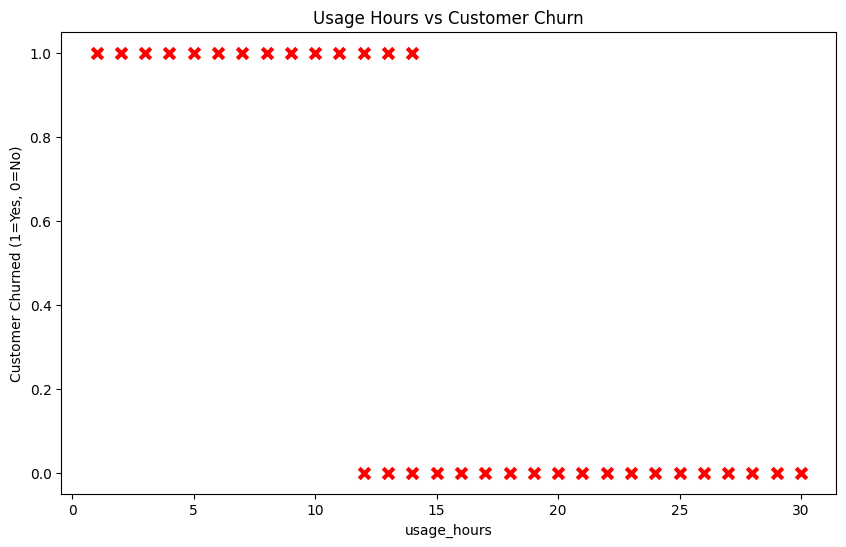

In [5]:
# Visualize usage_hours vs customer_churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='usage_hours', y='customer_churn', marker='X', s=120, color='red')
plt.title('Usage Hours vs Customer Churn')
plt.ylabel('Customer Churned (1=Yes, 0=No)')
plt.show()

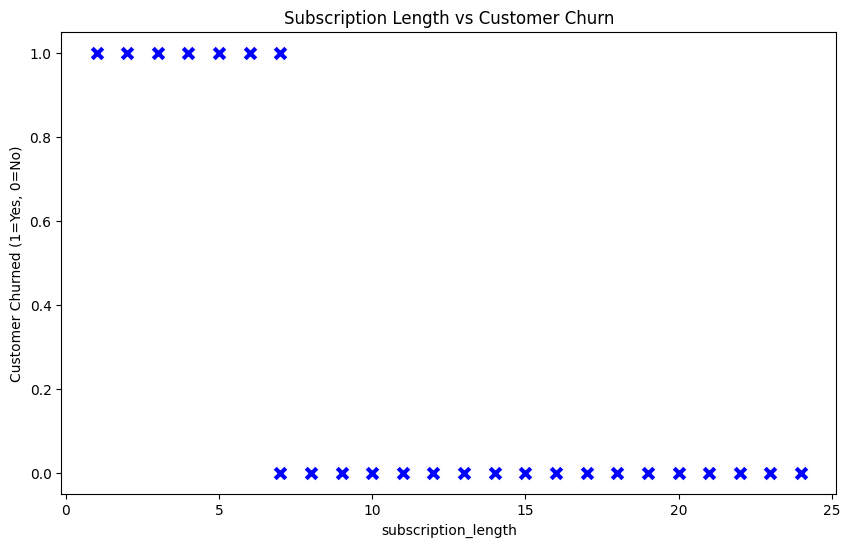

In [6]:
# Visualize subscription_length vs customer_churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='subscription_length', y='customer_churn', marker='X', s=120, color='blue')
plt.title('Subscription Length vs Customer Churn')
plt.ylabel('Customer Churned (1=Yes, 0=No)')
plt.show()

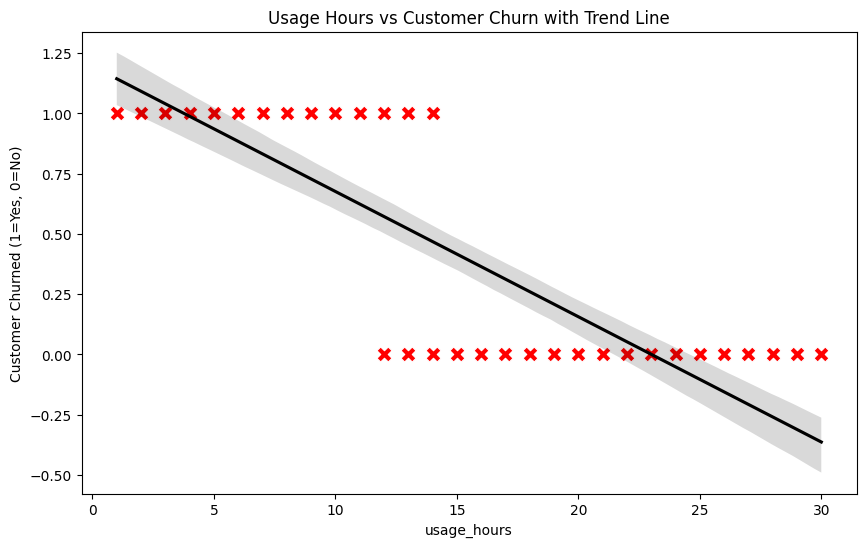

In [7]:
# Add a regression line to see the trend
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='usage_hours', y='customer_churn', marker='X', s=120, color='red')
sns.regplot(data=df, x='usage_hours', y='customer_churn', scatter=False, color='black')
plt.title('Usage Hours vs Customer Churn with Trend Line')
plt.ylabel('Customer Churned (1=Yes, 0=No)')
plt.show()

### Observations from Visualization

From the plots above, we can observe:
- Customers with lower usage hours tend to churn more frequently
- Customers with shorter subscription lengths are more likely to churn
- The relationship appears to be non-linear, which is appropriate for logistic regression

The trend line in the last plot shows that as usage hours increase, the probability of churn decreases. However, a linear regression line isn't appropriate for classification - this is why we need the sigmoid function in logistic regression.

![Sigmoid Function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

*(imgage source: wikimedia.org)*

*The sigmoid function transforms linear predictions into probabilities between 0 and 1.*

### 5. Split Data into Training and Testing Sets

We'll split our data into training (90%) and testing (10%) sets.

In [8]:
from sklearn.model_selection import train_test_split

# We'll use both features: usage_hours and subscription_length to predict customer churn
X = df[['usage_hours', 'subscription_length']]  
y = df['customer_churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 57 samples
Testing set: 19 samples


### 6. Create and Train Logistic Regression Model

Now we'll create a logistic regression model and train it using our training data.

In [9]:
from sklearn.linear_model import LogisticRegression

# Create the model
# The 'lbfgs' solver is an optimization algorithm suitable for small to medium-sized datasets
model = LogisticRegression(solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Examine model coefficients
print(f"Intercept: {model.intercept_[0]:.4f}")
print(f"Coefficient for usage_hours: {model.coef_[0][0]:.4f}")
print(f"Coefficient for subscription_length: {model.coef_[0][1]:.4f}")

Intercept: 17.0060
Coefficient for usage_hours: -0.5287
Coefficient for subscription_length: -1.3982


### Understanding the Coefficients

The coefficients tell us about the relationship between the features and the probability of churn:

- **Negative coefficients** mean that as the feature value increases, the probability of churn decreases
- **Positive coefficients** mean that as the feature value increases, the probability of churn increases

In our case, we expect both coefficients to be negative, indicating that higher usage hours and longer subscription lengths reduce the likelihood of churn.

### 7. Evaluate Model Performance

Let's evaluate our model's performance on the test data.

In [11]:
# Make predictions on test set
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0]


In [12]:
# Calculate accuracy
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f} ({accuracy*100:.1f}%)")

Model accuracy: 1.00 (100.0%)


In [13]:
# Show the prediction probabilities
# Each row gives [probability of not churning, probability of churning]
proba = model.predict_proba(X_test)
proba_df = pd.DataFrame(proba, columns=['Prob(Not Churn)', 'Prob(Churn)'])
proba_df['Actual'] = y_test.values
proba_df['Predicted'] = y_pred
proba_df

,Prob(Not Churn),Prob(Churn),Actual,Predicted
0,3.293940e-06,9.999967e-01,1,1
1,9.876060e-01,1.239401e-02,0,0
2,1.553652e-04,9.998446e-01,1,1
3,2.826520e-07,9.999997e-01,1,1
4,9.999076e-01,9.239706e-05,0,0
5,9.999944e-01,5.639201e-06,0,0
6,1.000000e+00,2.716628e-12,0,0
7,9.999997e-01,2.851951e-07,0,0
8,9.999992e-01,8.210464e-07,0,0
9,2.944237e-01,7.055763e-01,1,1


In [14]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0],
       [ 0,  8]])

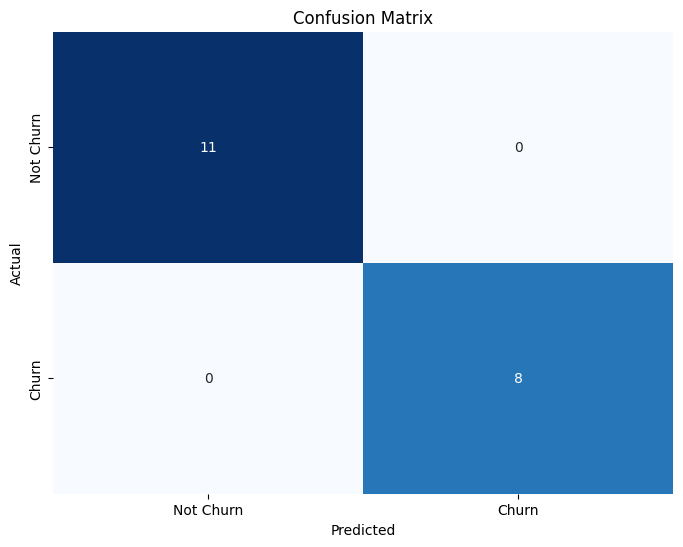

In [15]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from sklearn.metrics import classification_report
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         8

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



### 8. Visualize the Decision Boundary

Let's visualize how our model separates churned and non-churned customers based on both features.

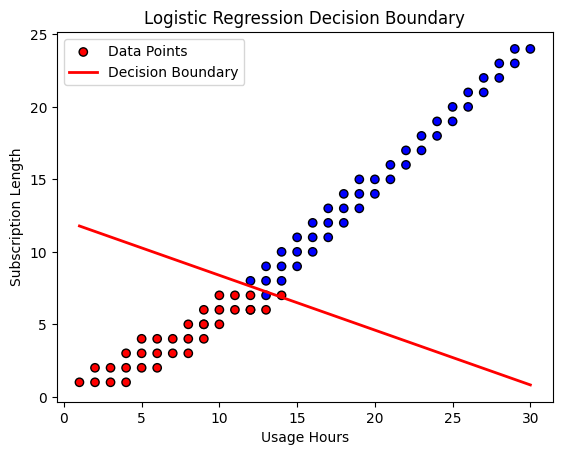

In [17]:
# Scatter plot of data points colored by class
plt.scatter(X['usage_hours'], X['subscription_length'], c=y, cmap='bwr', edgecolor='k', label='Data Points')

# Extract coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_[0]

# Create x values across the range
x_vals = np.array([X['usage_hours'].min(), X['usage_hours'].max()])

# Calculate corresponding y values for the decision boundary line
y_vals = -(coef[0] * x_vals + intercept) / coef[1]

# Plot the decision boundary line
plt.plot(x_vals, y_vals, 'r-', linewidth=2, label='Decision Boundary')

plt.xlabel('Usage Hours')
plt.ylabel('Subscription Length')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()


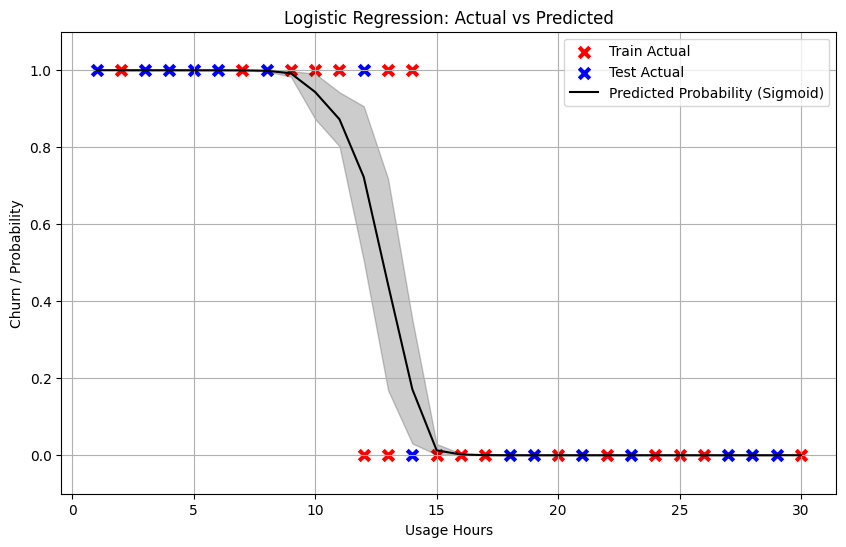

In [18]:
# Prepare train dataframe
df_train = X_train.copy()
df_train['actual_churn'] = y_train
df_train['predicted_proba'] = model.predict_proba(X_train)[:, 1]
df_train['set'] = 'train'

# Prepare test dataframe
df_test = X_test.copy()
df_test['actual_churn'] = y_test
df_test['predicted_proba'] = model.predict_proba(X_test)[:, 1]
df_test['set'] = 'test'

# Combine
df_all = pd.concat([df_train, df_test])

# Sort for line plotting
df_all_sorted = df_all.sort_values(by='usage_hours')

# Plot actual labels and predicted probabilities
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_train, x='usage_hours', y='actual_churn', color='red', marker='X', s=120, label='Train Actual')
sns.scatterplot(data=df_test, x='usage_hours', y='actual_churn', color='blue', marker='X', s=120, label='Test Actual')
sns.lineplot(data=df_all_sorted, x='usage_hours', y='predicted_proba', color='black', label='Predicted Probability (Sigmoid)')

plt.xlabel('Usage Hours')
plt.ylabel('Churn / Probability')
plt.title('Logistic Regression: Actual vs Predicted')
plt.legend()
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()


### 9. Make Predictions for New Data

Let's predict whether new customers with specific usage patterns will churn.

In [19]:
# Create sample new customer data
new_customers = pd.DataFrame({
    'usage_hours': [5, 12, 25],
    'subscription_length': [2, 10, 20]
})
print("New customer data:")
new_customers

New customer data:


,usage_hours,subscription_length
0,5,2
1,12,10
2,25,20


In [20]:
# Make predictions
predictions = model.predict(new_customers)
probabilities = model.predict_proba(new_customers)

# Display results
results = new_customers.copy()
results['predicted_churn'] = predictions
results['churn_probability'] = probabilities[:, 1]  # Probability of class 1 (churn)
results

,usage_hours,subscription_length,predicted_churn,churn_probability
0,5,2,1,9.999905e-01
1,12,10,0,3.486905e-02
2,25,20,0,3.165885e-11


### 10. Summary

In this notebook, we've learned how to use logistic regression for customer churn prediction:

1. **Data Exploration**: We analyzed customer usage patterns and their relationship to churn.
2. **Model Training**: We trained a logistic regression model to predict the probability of customer churn.
3. **Model Evaluation**: We evaluated the model's performance using accuracy, confusion matrix, and classification report.
4. **Visualization**: We visualized the decision boundary to understand how the model classifies customers.
5. **Prediction**: We made predictions for new customers based on their usage patterns.

**Key Findings:**
- Both higher usage hours and longer subscription lengths reduce the probability of churn.
- The model achieved good accuracy in distinguishing between customers likely to churn and those likely to stay.
- The decision boundary visualization shows how the model separates the two classes based on the features.

---

#### **Exercise : Simple Logistic Regression**

#### Problem Statement

* You are provided with a dataset (`student_exam.csv`) containing student features such as study hours and previous exam scores.

* The goal is to build a logistic regression model to predict whether a student will pass or fail an exam.

* You need to explore and visualize the data, then prepare it for modeling.

* The split the dataset into training and testing sets.

* Train a logistic regression model and evaluate it on test data.

* Visualize the decision boundary to interpret the model behavior.

---

* Download dataset : [student_exam.csv]() 
* Solution : [Exercise - Simple Logistic Regression]()